# OBJETIVO:

1. Identificar possíveis casos com erros no dataset, em que há valores nulos ou negativos para a variável quantidade.
2. Observar o comportamento de outras variáveis de transação nesses casos

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [166]:
df = pd.read_parquet("/data/challenges/hackathon_bigdata_2025/processed_data/transacoes_merged.parquet")
df_pos = df[df.quantidade > 0]

In [142]:
df.iloc[0]

pdv                    1001371918471115422
zipcode                            30175.0
produto                1029370090212151375
semana                                   1
mes                                      1
ano                                   2022
categoria_pdv                  Convenience
categoria                          Package
subcategoria                         Lager
premise                        Off Premise
tipos                              Package
label                                 Core
marca                       Michelob Ultra
fabricante           AB Anheuser Busch Inc
descricao        MICHELOB ULTRA 2/12/12 CN
gross_value                      54.299999
net_value                        49.740486
gross_profit                     16.224486
discount                               0.0
taxes                             4.559516
quantidade                             2.0
Name: 0, dtype: object

In [145]:
# net_value = gross_value - taxes

In [55]:
df.columns

Index(['pdv', 'zipcode', 'produto', 'semana', 'mes', 'ano', 'categoria_pdv',
       'categoria', 'subcategoria', 'premise', 'tipos', 'label', 'marca',
       'fabricante', 'descricao', 'gross_value', 'net_value', 'gross_profit',
       'discount', 'taxes', 'quantidade'],
      dtype='object')

In [56]:
df = df[df.quantidade <= 0] # Apenas casos <= 0

In [65]:
df.shape, df[df.quantidade == 0].shape, df[df.quantidade <0].shape

((110352, 21), (56047, 21), (54305, 21))

In [61]:
df.quantidade.min() - 1, df.quantidade.unique().shape[0]

(np.float64(-1531.0), 489)

In [96]:
df.quantidade.value_counts()

quantidade
 0.000000     56047
-1.000000     17613
-0.500000      6061
-2.000000      5811
-0.250000      2784
              ...  
-3.000024         1
-8.000028         1
-5.999952         1
-46.000008        1
-14.000004        1
Name: count, Length: 489, dtype: int64

In [98]:
df.quantidade.value_counts().sort_index(ascending=False)

quantidade
 0.000000e+00    56047
-5.960464e-08        3
-1.192093e-07        4
-2.384186e-07        1
-3.576279e-07        3
                 ...  
-6.780000e+02        1
-7.200000e+02        1
-1.200000e+03        1
-1.381000e+03        1
-1.530000e+03        1
Name: count, Length: 489, dtype: int64

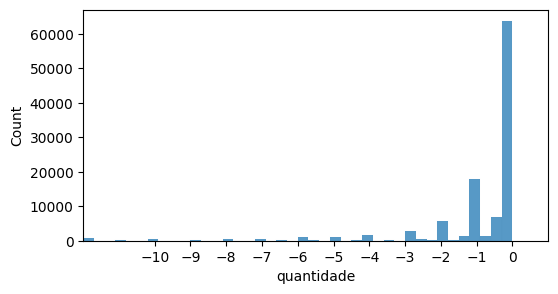

In [125]:
# Histograma da variável quantidade (casos <= 0)
#plt.hist(df.quantidade, bins = 6000, align='right', rwidth=0.4)
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='quantidade',bins=df.quantidade.nunique(), binwidth=0.3)
plt.xlim(-12, 1)
plt.xticks(np.arange(-10, 1, 1));
#plt.yticks([5000] +list(np.arange(0, 100001, 10000)), rotation=15)
#plt.grid(alpha=0.5)
plt.show()

Observamos que a maioria dos casos (>50k) são os de quantidade = 0.

Para qtd < 0, temos lucro negativo?

In [59]:
df_neg = df[df.quantidade<0]

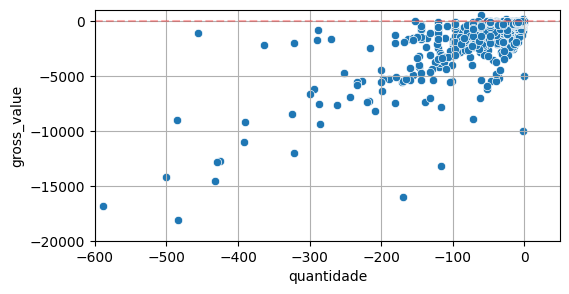

In [115]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=df_neg, x='quantidade', y='gross_value')
plt.xlim(-600,50)
plt.ylim(-20000,1000)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.3)
plt.grid()


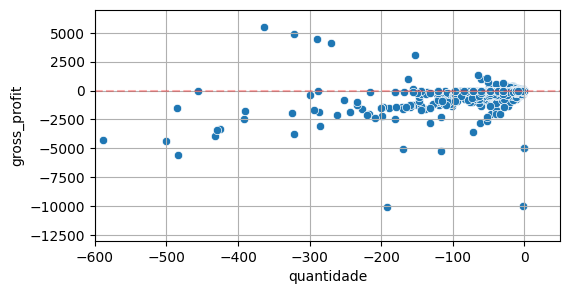

In [132]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=df_neg, x='quantidade', y='gross_profit')
plt.xlim(-600,50)
plt.ylim(-13000,7000)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.3)
plt.grid()

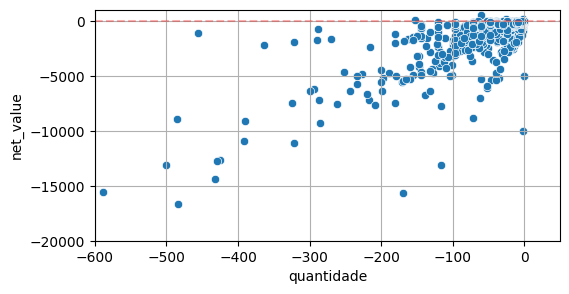

In [138]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=df_neg, x='quantidade', y='net_value')
plt.xlim(-600,50)
plt.ylim(-20000,1000)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.3)
plt.grid()

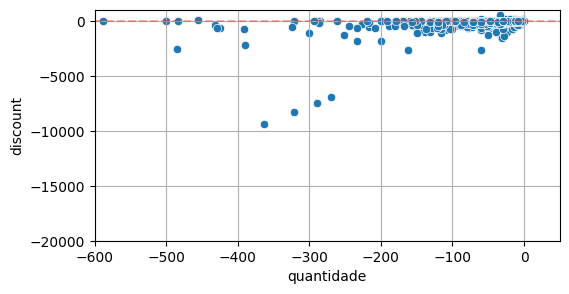

In [160]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=df_neg, x='quantidade', y='discount')
plt.xlim(-600,50)
plt.ylim(-20000,1000)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.3)
plt.grid()

In [134]:
df_neg.iloc[0]

pdv                                            1027356552181929439
zipcode                                                    30720.0
produto                                        1909985342164895673
semana                                                           1
mes                                                              1
ano                                                           2022
categoria_pdv                                         Super Center
categoria                                                  Package
subcategoria                                         Other Package
premise                                                Off Premise
tipos                                                      Package
label                                                         Core
marca             Michelob Ultra Organic Seltzer Signature Variety
fabricante                                   AB Anheuser Busch Inc
descricao        MICHELOB ULTRA ORGANIC SELTZER SIGNATURE VP 2

Observações:
1. Temos diversos casos com uma quantidade negativa não inteira, o que é incoerente, assumindo que a quantidade de vendas é necessariamente um valor inteiro, seja positivo ou negativo (não se vende 0.5 produto, por ex).
2. Para quantidades negativas inteiras, há uma série de instâncias em que gross_profit e net_value são também negativos. Assumindo que uma quantia negativa represente algum tipo de perda do produto (e.g. saíram da validade), é coerente que esses valores sejam negativos. Logo, quaisquer instâncias não negativas desses valores não fazem sentido. 
3. A variável discount representa um desconto no produto. Toda instância < 0 dela é incoerente


Agora, olhando casos em que a quantidade é zero:

In [146]:
df = df[df.quantidade == 0]

In [188]:
df.taxes.value_counts().sort_index() # ~ maioria dos impostos = 0 ou praticamente igual a zero

taxes
-4099.408691    1
-3488.029785    1
-1436.722534    1
-1342.777466    1
-1139.879028    1
               ..
 1138.853519    1
 1191.443806    1
 1202.123161    1
 1367.854858    1
 2073.237549    1
Name: count, Length: 15437, dtype: int64

In [154]:
df.net_value.value_counts().sort_values() # ~ maioria dos net_values = 0, porém há uma série de casos negativos

net_value
-37.199951         1
-61.160004         1
-180.000000        1
-8.199997          1
-1.760002          1
               ...  
-2.160002         44
-5.400002         58
-1.800003         63
 0.020004         88
 0.000000      51652
Name: count, Length: 1932, dtype: int64

In [156]:
df.gross_value.value_counts().sort_values() # ~ maioria dos gross_values = 0, porém há uma série de casos negativos

gross_value
 12.794998         1
 1.335007          1
-4.625000          1
-180.000000        1
-8.199997          1
               ...  
-2.160002         44
-5.400002         58
-1.800003         63
 0.020004         88
 0.000000      51693
Name: count, Length: 1874, dtype: int64

In [164]:
df.gross_profit.value_counts().sort_index() # ~ maioria dos gross_values = 0, porém há uma série de casos negativos

gross_profit
-39004.785156     1
-27173.433594     1
-24080.126953     1
-20480.544922     1
-18660.380859     1
                 ..
 20480.548828     1
 24080.121094     1
 27173.441406     1
 39004.789062     1
 274460.663929    1
Name: count, Length: 15554, dtype: int64

In [158]:
df.discount.value_counts().sort_values() # ~ diversos valores = 0, mas vários positivos, o que é coerente

discount
4.680000          1
163.199997        1
516.500000        1
56.899994         1
168.199997        1
              ...  
2.500000         46
3.000000         47
12.000000        63
15.000000        69
0.000000      51315
Name: count, Length: 1957, dtype: int64

Observações:

1. Os casos coerentes consistem nos que (net_value,gross_value, gross_profit) = 0. Nessas variáveis, há uma série de casos em que elas tem valores muito próximos de 0; Poderíamos fazer algum tipo de processamento para zerá-las, se mantivermos.
2. A variável discount pode ter qualquer valor >=0.


(0.0, 30000.0)

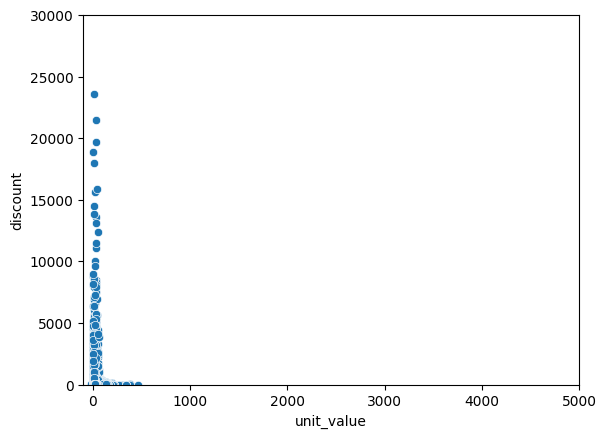

In [176]:
sample = df_pos.sample(100000)
sample['unit_value'] = sample['gross_value'] / sample['quantidade']
sns.scatterplot(data=sample, x='unit_value', y='discount')
plt.xlim(-100,5000)
plt.ylim(0,30000)


In [179]:
df_pos[(df_pos['discount'] > df_pos['gross_value'])]

,pdv,zipcode,produto,semana,mes,ano,categoria_pdv,categoria,subcategoria,premise,...,label,marca,fabricante,descricao,gross_value,net_value,gross_profit,discount,taxes,quantidade
276,1038124409129670108,30519.0,8707095500115469700,1,1,2022,Barbeque,Wine,Red Wine,On Premise,...,Close Out,S Anna's Merlot Season,Small Vineyards,TENUTA S. ANNA MERLOT,36.000000,30.417276,-40.502724,84.000000,5.582724,12.0
1119,1097355145902830813,80615.0,784556679610979772,1,1,2022,Package/Liquor,Package,Other Package,Off Premise,...,Core,Cacti Seltzer Variety,AB Anheuser Busch Inc,CACTI SELTZER VARIETY 18/12 CN 2/9,30.750000,30.075001,-76.139999,125.000000,0.675000,5.0
3721,1396394034393532416,80916.0,6098841113290535508,1,1,2022,Convenience,Package,Other Package,Off Premise,...,Core,Cacti Seltzer Lime,AB Anheuser Busch Inc,CACTI SELTZER LIME 15/25 CN,5.000000,4.765625,-19.398375,29.000000,0.234375,1.0
3757,1399578955714199512,80917.0,784556679610979772,1,1,2022,Package/Liquor,Package,Other Package,Off Premise,...,Core,Cacti Seltzer Variety,AB Anheuser Busch Inc,CACTI SELTZER VARIETY 18/12 CN 2/9,6.150000,6.015000,-15.269000,25.799999,0.135000,1.0
4593,1489411194430077013,80828.0,4697204510956344244,1,1,2022,Package/Liquor,Package,Other Package,Off Premise,...,Core,Bud Light Seltzer Tea Lemonade Variety Pack,AB Anheuser Busch Inc,BUD LIGHT SELTZER TEA LEMONADE VP 24/12 CN,54.119999,53.219997,-32.435001,80.750000,0.900000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6269573,809108000831449524,80631.0,6504514533420270914,5,12,2022,Bar,Distilled Spirits,Canadian Whisky,On Premise,...,None,Fireball Cinnamon Whiskey,Sazerac Spirits,FIREBALL 12/1L 66PF,216.850800,209.619980,-0.000016,225.360001,7.230816,12.0
6269974,8197698891485947230,31905.0,1906579625012192538,5,12,2022,Military,Distilled Spirits,Other Spirits,Off Premise,...,Discontinued,Soonhari Strawberry,Lotte Beverage America - Spirits,SOONHARI STRAWBERRY,288.400009,288.400009,48.160009,312.800013,0.000000,80.0
6270008,8205714931510262781,30752.0,5626969389367343590,5,12,2022,Convenience,ABA Spirits,Other ABA Spirits,Off Premise,...,Core,Sazerac Flash Point,Sazerac ABA,SAZERAC FLASH POINT WNBS 1.5 LTR 42PRF,41.520000,33.509346,9.819348,46.139999,8.010654,6.0
6273041,8834059245956888754,30725.0,5626969389367343590,5,12,2022,Convenience,ABA Spirits,Other ABA Spirits,Off Premise,...,Core,Sazerac Flash Point,Sazerac ABA,SAZERAC FLASH POINT WNBS 1.5 LTR 42PRF,13.840000,11.169782,3.273116,15.380000,2.670218,2.0


In [180]:
df_pos['pdv_produto'] = df_pos['pdv'] + "_" + df_pos['produto']

/tmp/ipykernel_345058/1469350361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['pdv_produto'] = df_pos['pdv'] + "_" + df_pos['produto']


In [181]:
df_pos['pdv_produto'].value_counts()

pdv_produto
2760018522154709469_3894706280449257667    57
4944819258719870167_1938760505411922162    57
1474309873477514622_1029370090212151375    56
9108176782777408036_1938760505411922162    56
3188906461264284944_1938760505411922162    56
                                           ..
4234539155839849443_7623428228789006429     1
4234539155839849443_7616178193689624010     1
4234539155839849443_7552994870611052892     1
4234539155839849443_7471985070343154106     1
4234539155839849443_8050468025014665515     1
Name: count, Length: 1022569, dtype: int64

In [183]:
471.875 - 453.125

18.75

In [184]:
105.924 - 87.175

18.74900000000001

In [185]:
df_pos[df_pos.pdv_produto == "2760018522154709469_3894706280449257667"].head()

,pdv,zipcode,produto,semana,mes,ano,categoria_pdv,categoria,subcategoria,premise,...,marca,fabricante,descricao,gross_value,net_value,gross_profit,discount,taxes,quantidade,pdv_produto
16467,2760018522154709469,81301.0,3894706280449257667,1,1,2022,Super Center,Package,Lager,Off Premise,...,Busch Light,AB Anheuser Busch Inc,BUSCH LIGHT 30/12 CN,176.750,174.50,36.669998,27.00,2.250,10.0,2760018522154709469_3894706280449257667
97655,2760018522154709469,81301.0,3894706280449257667,1,2,2022,Super Center,Package,Lager,Off Premise,...,Busch Light,AB Anheuser Busch Inc,BUSCH LIGHT 30/12 CN,471.875,466.25,105.924999,76.25,5.625,25.0,2760018522154709469_3894706280449257667
200926,2760018522154709469,81301.0,3894706280449257667,1,3,2022,Super Center,Package,Lager,Off Premise,...,Busch Light,AB Anheuser Busch Inc,BUSCH LIGHT 30/12 CN,453.125,447.50,87.174999,86.25,5.625,25.0,2760018522154709469_3894706280449257667
307494,2760018522154709469,81301.0,3894706280449257667,1,4,2022,Super Center,Package,Lager,Off Premise,...,Busch Light,AB Anheuser Busch Inc,BUSCH LIGHT 30/12 CN,181.250,179.00,38.720001,34.50,2.250,10.0,2760018522154709469_3894706280449257667
423178,2760018522154709469,81301.0,3894706280449257667,1,5,2022,Super Center,Package,Lager,Off Premise,...,Busch Light,AB Anheuser Busch Inc,BUSCH LIGHT 30/12 CN,362.500,358.00,77.440002,69.00,4.500,20.0,2760018522154709469_3894706280449257667


In [187]:
example = df_pos[df_pos.pdv_produto == "2760018522154709469_3894706280449257667"].iloc[0]

In [ ]:
# Custo da mercadoria = gross_value / quantidade (para o cliente)
# Custo para da mercadoria para o pdv = net_value - gross_profit

# Valor total pago pelo cliente = gross_value; O preço original seria (gross_value + discount)
# Net_value: faturamento da venda descontando impostos
# Gross_value = net_value - custo_de_mercadoria